In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH = "/content/drive/My Drive/Hackhathon 2020 Shared Drive/Dataset/SG_car.csv"
SG_car = pd.read_csv(PATH)

In [3]:
from sklearn.cluster import MiniBatchKMeans
coords = np.vstack((SG_car[['latitude_origin', 'longitude_origin']].values,
                    SG_car[['latitude_destination', 'longitude_destination']].values))

sample_ind = np.random.permutation(len(coords))
kmeans = MiniBatchKMeans(n_clusters=55, batch_size=10000).fit(coords[sample_ind])

SG_car.loc[:, 'pickup_cluster'] = kmeans.predict(SG_car[['latitude_origin', 'longitude_origin']])
SG_car.loc[:, 'dropoff_cluster'] = kmeans.predict(SG_car[['latitude_destination', 'longitude_destination']])

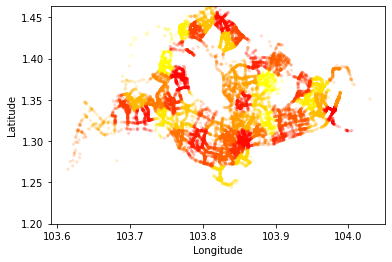

In [6]:
import matplotlib.pyplot as plt

city_long_border = (103.590506, 104.050822)
city_lat_border = (1.199654, 1.463254)

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(SG_car.longitude_origin.values, SG_car.latitude_origin.values, s=10, lw=0,
           c=SG_car.pickup_cluster.values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


In [8]:
import joblib

filename = 'model/kmeans.pkl'
joblib.dump(kmeans, filename)


['/content/drive/My Drive/Hackhathon 2020 Shared Drive/model/kmeans.pkl']